This is the intro text to the following graph

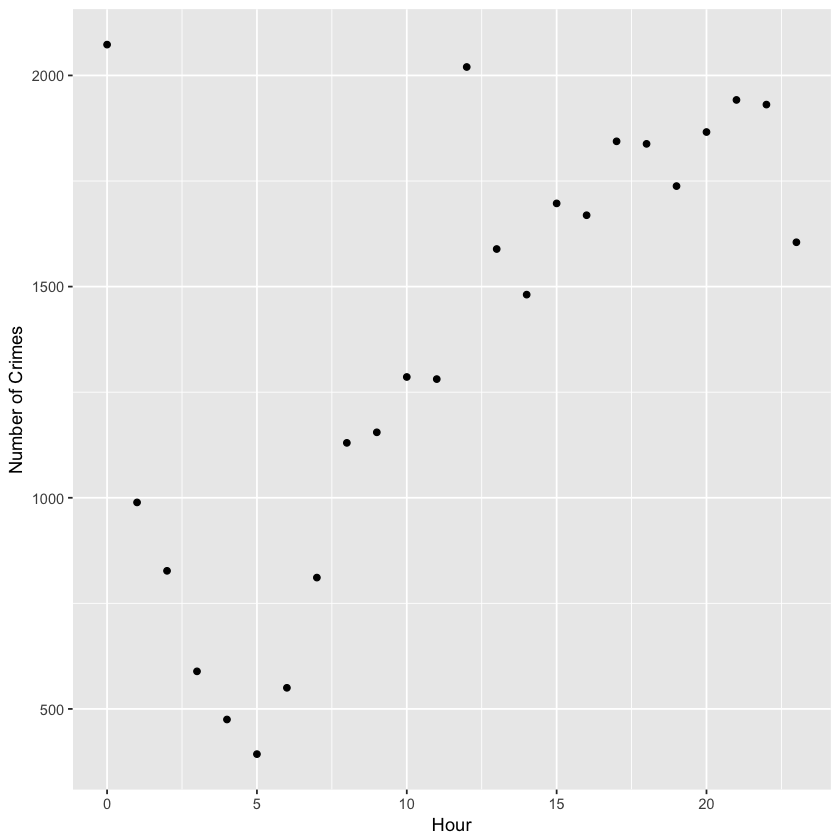

In [4]:
setwd("/Users/csanabria/Dropbox/Data Science/Data Science at Scale/datasci_course_materials/assignment6")
library(data.table)
library(dplyr)
library(bit64)
library(ggplot2)
seattleData <- fread(input = "seattle_incidents_summer_2014.csv")
sanfranciscoData <- fread(input = "sanfrancisco_incidents_summer_2014.csv")

seattleDT = as.data.table(seattleData)
seattleDT$Date <- as.Date(substr(seattleDT$`Occurred Date or Date Range Start`, 1, 10), "%m/%d/%Y")
seattleDT$Hour <- as.integer(substr(seattleDT$`Occurred Date or Date Range Start`, 12,13)) 
seattleDT$Hour[substr(seattleDT$`Occurred Date or Date Range Start`, 21,22) %in% c("PM") & seattleDT$Hour == 1] <- 13
seattleDT$Hour[substr(seattleDT$`Occurred Date or Date Range Start`, 21,22) %in% c("PM") & seattleDT$Hour == 2] <- 14
seattleDT$Hour[substr(seattleDT$`Occurred Date or Date Range Start`, 21,22) %in% c("PM") & seattleDT$Hour == 3] <- 15
seattleDT$Hour[substr(seattleDT$`Occurred Date or Date Range Start`, 21,22) %in% c("PM") & seattleDT$Hour == 4] <- 16
seattleDT$Hour[substr(seattleDT$`Occurred Date or Date Range Start`, 21,22) %in% c("PM") & seattleDT$Hour == 5] <- 17
seattleDT$Hour[substr(seattleDT$`Occurred Date or Date Range Start`, 21,22) %in% c("PM") & seattleDT$Hour == 6] <- 18
seattleDT$Hour[substr(seattleDT$`Occurred Date or Date Range Start`, 21,22) %in% c("PM") & seattleDT$Hour == 7] <- 19
seattleDT$Hour[substr(seattleDT$`Occurred Date or Date Range Start`, 21,22) %in% c("PM") & seattleDT$Hour == 8] <- 20
seattleDT$Hour[substr(seattleDT$`Occurred Date or Date Range Start`, 21,22) %in% c("PM") & seattleDT$Hour == 9] <- 21
seattleDT$Hour[substr(seattleDT$`Occurred Date or Date Range Start`, 21,22) %in% c("PM") & seattleDT$Hour == 10] <- 22
seattleDT$Hour[substr(seattleDT$`Occurred Date or Date Range Start`, 21,22) %in% c("PM") & seattleDT$Hour == 11] <- 23
seattleDT$Hour[substr(seattleDT$`Occurred Date or Date Range Start`, 21,22) %in% c("AM") & seattleDT$Hour == 12] <- 0

plotDT <- seattleDT[, .(`Number of Crimes` = .N), .(Hour)]
ggplot(plotDT,
       aes (x = Hour,
            y = `Number of Crimes`))+
  geom_point()